<a href="https://colab.research.google.com/github/m-triassi/ai-projects-472/blob/main/Project1_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task 1
This Task consists of using the BBC Dataset to teach a Multinomial Naive Bayes classifier to distinguish between different article types. A given article should be classified into 1 of 5 different categories: business,
entertainment, politics, sport, and tech


In [1]:
# Import Dependencies
import numpy as np
import matplotlib.pyplot as plt
import os, os.path
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import sklearn.datasets as datasets
from pathlib import Path

In [2]:
# Import Dataset
from google.colab import drive
# drive.mount('/content/drive', force_remount=True) # Only for development
!gdown --id 1hg8v4l7iGcqW83tNwbBRlVaFtfNCn6rr
!unzip /content/BBC.zip

Downloading...
From: https://drive.google.com/uc?id=1hg8v4l7iGcqW83tNwbBRlVaFtfNCn6rr
To: /content/BBC.zip
100% 2.76M/2.76M [00:00<00:00, 12.9MB/s]
Archive:  /content/BBC.zip
   creating: BBC/business/
  inflating: BBC/business/001.txt    
  inflating: BBC/business/002.txt    
  inflating: BBC/business/003.txt    
  inflating: BBC/business/004.txt    
  inflating: BBC/business/005.txt    
  inflating: BBC/business/006.txt    
  inflating: BBC/business/007.txt    
  inflating: BBC/business/008.txt    
  inflating: BBC/business/009.txt    
  inflating: BBC/business/010.txt    
  inflating: BBC/business/011.txt    
  inflating: BBC/business/012.txt    
  inflating: BBC/business/013.txt    
  inflating: BBC/business/014.txt    
  inflating: BBC/business/015.txt    
  inflating: BBC/business/016.txt    
  inflating: BBC/business/017.txt    
  inflating: BBC/business/018.txt    
  inflating: BBC/business/019.txt    
  inflating: BBC/business/020.txt    
  inflating: BBC/business/021.txt    


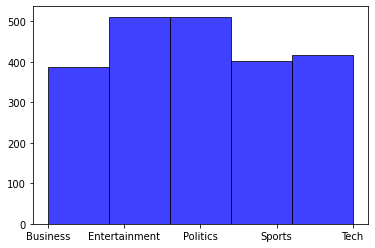

In [3]:
# Plot distribution of BBC Dataset

## Set up data + labels
dir = "/content/BBC"
y = np.array([])
curr_label = 1
labels = ["Business", "Entertainment", "Politics", "Sports", "Tech"]

## create probability ditribution by adding a particular label to an array n times
## where n is the the number of files per folder
for name in os.listdir(dir):
  if os.path.isdir(os.path.join(dir, name)) and not name.startswith("."):
    y = np.append(y, np.repeat(curr_label, len(os.listdir(os.path.join(dir, name)))))
    curr_label += 1
    
## Set up the plot
plt.xticks(np.arange(1, 6), labels)
n, bins, patches = plt.hist(y, bins=5, facecolor='b', alpha=0.75, ec="k")
plt.show()

In [4]:
# Load Corpus
corpus = datasets.load_files(dir, encoding='latin1')
y = corpus.target

In [5]:
# Pre-Process Data set

## vectorize texts into word frequencies for model use
vectorizer = CountVectorizer()
X_text = vectorizer.fit_transform(corpus['data'])
print(X_text.shape, y.shape)

(2225, 29421) (2225,)


In [6]:
# Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X_text, y, test_size=.20, random_state=None)



---


#Naive Bayes: Try 1


---




In [7]:
# Train Naive Bayes: Try 1
nb_one = MultinomialNB()
nb_one.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

##(B)
###Confusion Matrix


In [8]:
print (nb_one.score(X_test, y_test))
y_pred = nb_one.predict(X_test)
# print(y_test)
# print(y_pred)
print(confusion_matrix(y_test, y_pred))

0.9775280898876404
[[ 96   0   2   0   3]
 [  0  74   1   0   1]
 [  1   0  91   0   1]
 [  0   0   0 100   0]
 [  0   1   0   0  74]]


## (C)
###Precision, Recall, F1-measure

In [9]:
print(classification_report(y_test, y_pred, target_names=labels))

               precision    recall  f1-score   support

     Business       0.99      0.95      0.97       101
Entertainment       0.99      0.97      0.98        76
     Politics       0.97      0.98      0.97        93
       Sports       1.00      1.00      1.00       100
         Tech       0.94      0.99      0.96        75

     accuracy                           0.98       445
    macro avg       0.98      0.98      0.98       445
 weighted avg       0.98      0.98      0.98       445



## (D)

###Accuracy

In [10]:
print(accuracy_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred, normalize=False))

0.9775280898876404
435


### Macro average F1

In [11]:
f1_score(y_test, y_pred, average = 'macro')

0.9768260826305235

###Weighted average F1

In [12]:
f1_score(y_test, y_pred, average = 'weighted')

0.9775747218571659

##(E)
###Prior probability of each class

In [13]:
# nb.Proba()???

## (F)

### Size of Vocabulary

In [14]:
len(vectorizer.vocabulary_)


29421

## (E)

### Number of Word-tokens in each class

In [15]:
class_count = [0, 0, 0, 0, 0]
array_text = X_text.toarray()

for index in range(len(array_text)):
  class_count[y[index]-1] += sum(array_text[index])

print(class_count)

[124893, 185208, 162953, 198640, 164663]


## (H)

### Number of Word-tokens in corpus

In [16]:
sum(map(sum, array_text))

836357

## (I)

## Words with Freq of zero in each class

In [17]:
class_non_zero_count = [0, 0, 0, 0, 0]
# ahhh

## (I)

## Words with Freq of one in entire corpus

# Naive Bayes: Try 2

Note: cells displaying model performance will be ommited in all future tries in favor of generating an addition to the text file report.

In [18]:
# Train Naive Bayes: Try 2
nb_two = MultinomialNB()
nb_two.fit(X_train, y_train)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

#Naive Bayes: Try 3

In [19]:
# Train Naive Bayes: Try 3
nb_three = MultinomialNB(alpha=0.0001)
nb_three.fit(X_train, y_train)

MultinomialNB(alpha=0.0001, class_prior=None, fit_prior=True)

# Naive Bayes: Try 4

In [20]:
# Train Naive Bayes: Try 4
nb_four = MultinomialNB(alpha=0.9)
nb_four.fit(X_train, y_train)

MultinomialNB(alpha=0.9, class_prior=None, fit_prior=True)

In [21]:
# Generate / Appened to Performance file 

# model is the instance of NB, Label is the text that will show at the top of the run
# 
def generate_report(model, label, vector, dataset):
  """
  Appends to a report file with the statistics of a particular model run.

  Parameters
  ----------
  model : object
    Instance of the machine learning model, NB, Decision tree, etc
  label : string
    String that will appear at the top of a particular run in the text file
  vector : object
    Count vectorizor class, fit on the current corpus
  dataset : object
    the fit_transform output of the above vectorizor

  """
  f = open("bbc_performance.txt", "a")
  f.write("\n==========================================================")
  f.write("\nAttempt Description: " + label)

  f.write("\nConfusion Martix + Score:\n")
  f.write(str(model.score(X_test, y_test)))
  f.write("\n")
  y_pred = model.predict(X_test)
  f.write(str(confusion_matrix(y_test, y_pred)))

  f.write("\nClassification Report (precision, recall, and F1-measure )\n")
  f.write(str(classification_report(y_test, y_pred, target_names=labels)))

  f.write("\nAccuracy Score: accuracy, macro-average F1 and weighted-average F1\n")
  f.write(str(accuracy_score(y_test, y_pred, normalize=False)))
  f.write("\n")
  f.write(str(f1_score(y_test, y_pred, average = 'macro')))
  f.write("\n")
  f.write(str(f1_score(y_test, y_pred, average = 'weighted')))
  f.write("\n")

  f.write("\nSize of Vocabulary\n")
  f.write(str(len(vector.vocabulary_)))

  f.write("\nNumber of Word Tokens in each class\n\n")
  class_count = [0, 0, 0, 0, 0]
  array_text = dataset.toarray()

  for index in range(len(X_text.toarray())):
    class_count[y[index]-1] += sum(array_text[index])

  f.write(str(class_count))
  
  f.write("\n")
  
  f.write("\nNumber of Word Tokens in Entire Corpus\n\n")
  f.write(str(sum(map(sum, dataset.toarray()))))

  f.close()



generate_report(nb_one, "Multi-nomialNB default values, try 1", vectorizer, X_text)
generate_report(nb_two, "Multi-nomialNB default values, try 2", vectorizer, X_text)
generate_report(nb_three, "Multi-nomialNB with 0.0001 smoothing, try 3", vectorizer, X_text)
generate_report(nb_four, "Multi-nomialNB with 0.9 smoothing, try 4", vectorizer, X_text)
